# 3주차

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## breast cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
input = data.data
output = data.target

In [ ]:
print(input.shape, output.shape)

(569, 30) (569,)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문

In [ ]:
x_train.shape

torch.Size([398, 30])

In [ ]:
y_train

tensor([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,

In [ ]:
print(x_train[0])
print(y_train[0])

tensor([1.1620e+01, 1.8180e+01, 7.6380e+01, 4.0880e+02, 1.1750e-01, 1.4830e-01,
        1.0200e-01, 5.5640e-02, 1.9570e-01, 7.2550e-02, 4.1010e-01, 1.7400e+00,
        3.0270e+00, 2.7850e+01, 1.4590e-02, 3.2060e-02, 4.9610e-02, 1.8410e-02,
        1.8070e-02, 5.2170e-03, 1.3360e+01, 2.5400e+01, 8.8140e+01, 5.2810e+02,
        1.7800e-01, 2.8780e-01, 3.1860e-01, 1.4160e-01, 2.6600e-01, 9.2700e-02],
       device='cuda:0')
tensor(1, device='cuda:0')


In [ ]:
x_test.shape

torch.Size([171, 30])

In [ ]:
y_test.shape

torch.Size([171])

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [ ]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [ ]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까?
# hidden layer/neuron 수를 바꾸기

# nn.Sequential을 사용하여 레이어를 연결

model = nn.Sequential(
          nn.Linear(30,398, bias=True),
          nn.Sigmoid(),
          nn.Linear(398,15, bias=True),
          nn.Sigmoid(),
          nn.Linear(15,2, bias=True),
          nn.Softmax(),
          ).to(device) # softmax dim default = None

In [ ]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(30,398, bias=True), # input_layer = 30, hidden_layer1 = 398
          nn.Sigmoid(),
        nn.BatchNorm1d(398)
    )
  # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # relu = nn.ReLU()
  # output = relu(x)
  # def relu(x):
  #   return np.maximum(0,x)
  # def relu(x):
  #   return torch.max(torch.zeros_like(x),x)
  # def tanh(x):
  #   return torch.tanh(x)
  # import math
  # def tanh(x):
  #   return (2 / (1 + math.exp(-2 * x))) -1

  # or

  # def tanh(x):
  #   return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨

    self.layer2 = nn.Sequential(
          nn.Linear(398,15, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(15,10, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10, 2, bias=True), # hidden_layer3 = 10, output_layer = 2
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-20-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=30, out_features=398, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=15, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=2, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=30, out_features=398, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=15, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=2, bias=True)
    (1): Softmax(dim=None)
  )
)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)


# optimizer_adam = optim.Adam(model.parameters(), lr= 0.01)
# optimizer_sgd_1 = optim.SGD(model.parameters(), lr=0.01)
# optimizer_sgd_2 = optim.SGD(model.parameters(), lr=0.1)
# optimizer_adagrad = optim.Adagrad(model.parameters(), lr=0.01)
# optimizer_adadelta = optim.Adadelta(model.parameters(), lr=0.1)
# optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.01)


# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [ ]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:   # 10 에폭마다 출력
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 0.7273460030555725
10 0.5359485149383545
20 0.45676928758621216
30 0.425161749124527
40 0.39671677350997925
50 0.4025011658668518
60 0.39178261160850525
70 0.3826488256454468
80 0.3798086941242218
90 0.383084237575531


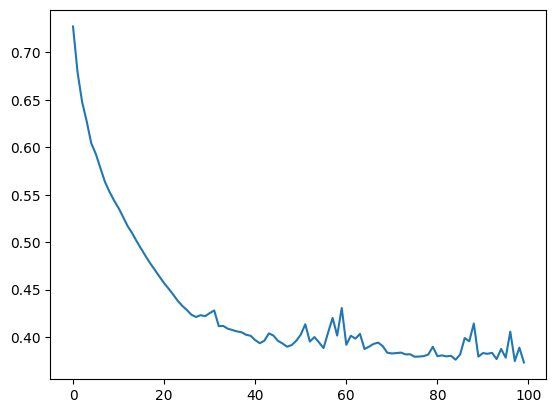

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.00845658 0.9915434 ]
argmax를 한 후의 output은 1
accuracy는 0.9122807017543859


# Wine

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
input = data.data
output = data.target

In [ ]:
print(input.shape, output.shape)

(178, 13) (178,)


In [ ]:
output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 40, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

In [ ]:
print(x_train.shape, y_train.shape)

torch.Size([124, 13]) torch.Size([124])


In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)

    return x,y

In [ ]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [ ]:
model = nn.Sequential(
          nn.Linear(13,160, bias=True),
          nn.Sigmoid(),
          nn.Linear(160,70, bias=True),
          nn.Sigmoid(),
          nn.Linear(70,15, bias=True),
          nn.Sigmoid(),
          nn.Linear(15,3, bias=True),
          nn.Softmax()
          ).to(device)

In [ ]:
# 활성화 함수로 relu 사용, 1번 3번 layer에 추가

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 160, bias=True),
            nn.ReLU(),  # ReLU 활성화 함수 사용
            nn.BatchNorm1d(160)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(160, 70, bias=True),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(70, 15, bias=True),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output


In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-40-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=160, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=160, out_features=70, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=70, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=160, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=160, out_features=70, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=70, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [ ]:
# losses = []
# for epoch in range(100):

#   optimizer.zero_grad()
#   hypothesis = model(x_train)

#   # 비용 함수
#   cost = loss_fn(hypothesis, y_train)
#   cost.backward()
#   optimizer.step()
#   losses.append(cost.item())

#   if epoch % 10 == 0:
#     print(epoch, cost.item())

# 돌리고나서 중복실행해서 나온 결과...

0 1.220799446105957
10 1.220799446105957
20 1.220799446105957
30 1.220799446105957
40 1.220799446105957
50 1.220799446105957
60 1.220799446105957
70 1.220799446105957
80 1.220799446105957
90 1.220799446105957


In [ ]:
#  tanh, SGD

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 160, bias=True),
            nn.Tanh(),
            nn.BatchNorm1d(160)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(160, 70, bias=True),
            nn.Tanh()
        )
        self.layer3 = nn.Sequential(
            nn.Linear(70, 15, bias=True),
            nn.Tanh()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-63-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=160, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=160, out_features=70, bias=True)
    (1): Tanh()
  )
  (layer3): Sequential(
    (0): Linear(in_features=70, out_features=15, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
# optimizer_sgd_1 = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 1.173649549484253
10 1.0848422050476074
20 1.0424833297729492
30 1.081160306930542
40 1.080559253692627
50 1.0877026319503784
60 1.0863946676254272
70 1.0840466022491455
80 1.0755935907363892
90 1.0563621520996094


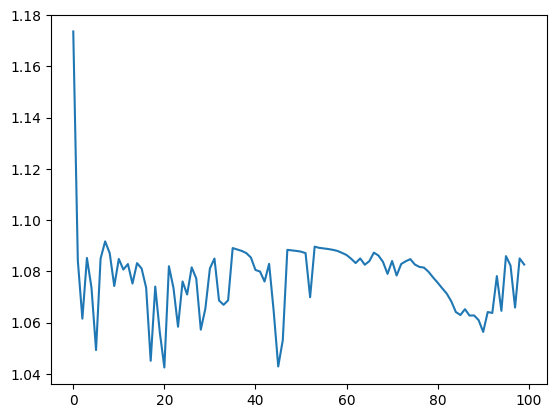

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.36768594 0.3381559  0.29415813]
argmax를 한 후의 output은 0
accuracy는 0.5


In [ ]:
# relu, # optimizer_adadelta = optim.Adadelta(model.parameters(), lr=0.1)

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 160, bias=True),
            nn.ReLU(),
            nn.BatchNorm1d(160)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(160, 70, bias=True),
            nn.ReLU()
        )
        self.layer3 = nn.Sequential(
            nn.Linear(70, 15, bias=True),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

model = Model().to(device)
model.apply(init_weights)

print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=160, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=160, out_features=70, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=70, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


<ipython-input-71-62bfd79df0ff>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer_sgd = optim.Adadelta(model.parameters(), lr=0.1)

In [ ]:
losses = []
for epoch in range(100):

  optimizer_sgd.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer_sgd.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 1.1606053113937378
10 1.0487098693847656
20 0.9717825651168823
30 0.9136146306991577
40 0.8785364031791687
50 0.8510856628417969
60 0.8294205665588379
70 0.8070135712623596
80 0.7821521759033203
90 0.7457965612411499


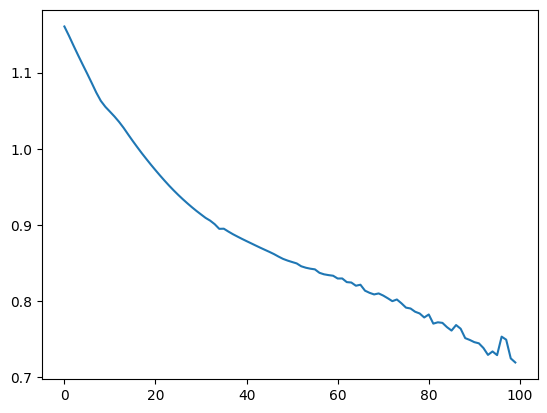

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.906409   0.03785494 0.05573596]
argmax를 한 후의 output은 0
accuracy는 0.8333333333333334


# CNN 찍먹

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 103681887.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24716525.98it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33392197.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3796438.57it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은? 320

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-57-006ecbc6c563>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301135
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.290469
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.247846
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.250249
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.232824
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.184454
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.166368
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.150559
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.042047
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.865286
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.717680
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.556233
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.111711
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.122616
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.913562
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.678018
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.608513
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.515161
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.537868
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.837011
Train Epoch: 1 [12800/60000 (

<ipython-input-60-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1748, Accuracy: 9475/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.144985
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.163473
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.118351
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.199261
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.316892
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.137561
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.167569
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.106071
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.061539
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.041570
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.213852
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.121816
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.070251
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.112583
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.190938
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.107586
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.097048
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.185709
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.147158
Train Epoch: 2 [12